## imports and preparation of the dataframe

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import preprocessor as p
import warnings

#toggle warnings
warnings.filterwarnings('ignore')

#load the data
preprocessor = p.preprocessor()
df = preprocessor.cleanDataset()
print('preparation successful')

preparation successful


## real goal distribution for goal variable

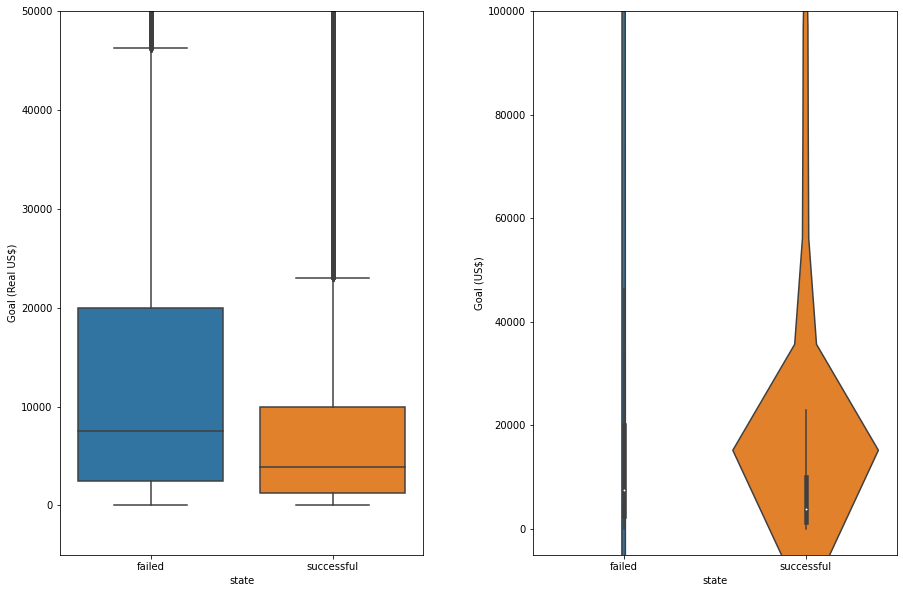

Maximum of real goal failed projects
166361390.71
Minimum of real goal failed projects
0.15
Median of real goal failed projects
7500.0
Maximum of  goal successful projects
2015608.88
Minimum of goal successful projects
0.01
Median of real goal failed projects
3840.0


In [2]:
#Boxplots State vs. Goal (Real US$)
plt.figure(figsize=(15,10))
plt.subplots_adjust(wspace=0.3)
plt.subplot(1,2,1)
sns.boxplot(x=df["state"],
            y=df["usd_goal_real"])
plt.ylabel('Goal (Real US$)')
plt.ylim(-5000, 50000)
plt.xlim(None, None)

#Violinplots State vs. Goal (Real US$)
plt.subplot(1,2,2)
sns.violinplot(x=df["state"],
                y=df["usd_goal_real"])
plt.ylabel('Goal (US$)')
plt.ylim(-5000, 100000)
plt.xlim(None, None)
plt.show()

#more Information of the Data
df_failed = df[df['state'].isin(['failed'])]

print('Maximum of real goal failed projects')
print(df_failed['usd_goal_real'].max())

print('Minimum of real goal failed projects')
print(df_failed['usd_goal_real'].min())

print('Median of real goal failed projects')
print(np.median(df_failed['usd_goal_real']))


df_successful = df[df['state'].isin(['successful'])]

print('Maximum of  goal successful projects')
print(df_successful['usd_goal_real'].max())

print('Minimum of goal successful projects')
print(df_successful['usd_goal_real'].min())

print('Median of real goal failed projects')
print(np.median(df_successful['usd_goal_real']))


#boxplot shows heavy outliers for projects with failed state
#larger range of goal for failed projects
#Maximum and Median of real goal is much larger for failed Projects
#Most of the successful projects have a goal < 10.000

#high goals could ctrontribute to the failing of a project


## scatterplot duration backers

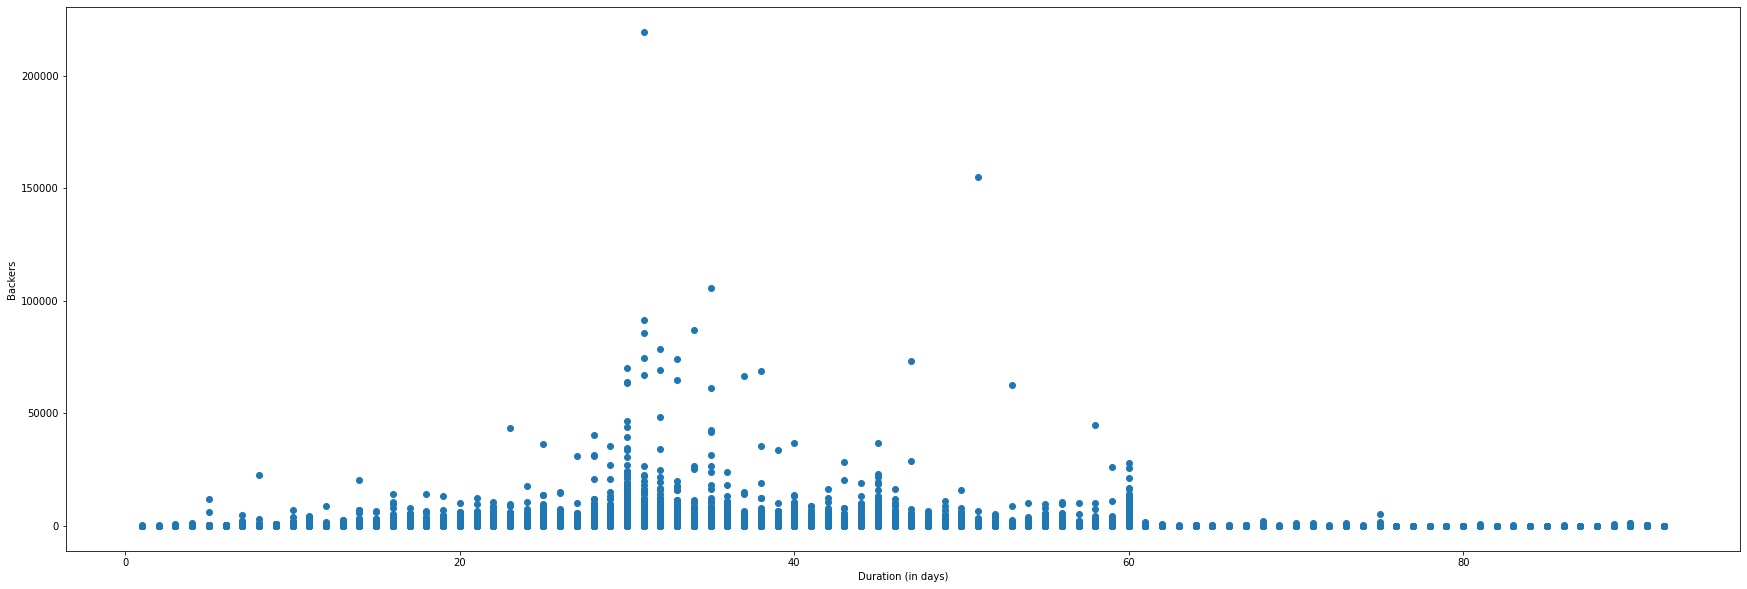

In [3]:
duration_float = df['duration_days']
backers = df['backers']
plt.figure(figsize=(30,10))
plt.scatter(duration_float,backers)
plt.xlabel('Duration (in days)')
plt.ylabel('Backers')
plt.show()

#No real Realtionship can be found between The funding duration and the total number of backers

## scatterplot duration percentage goal reached

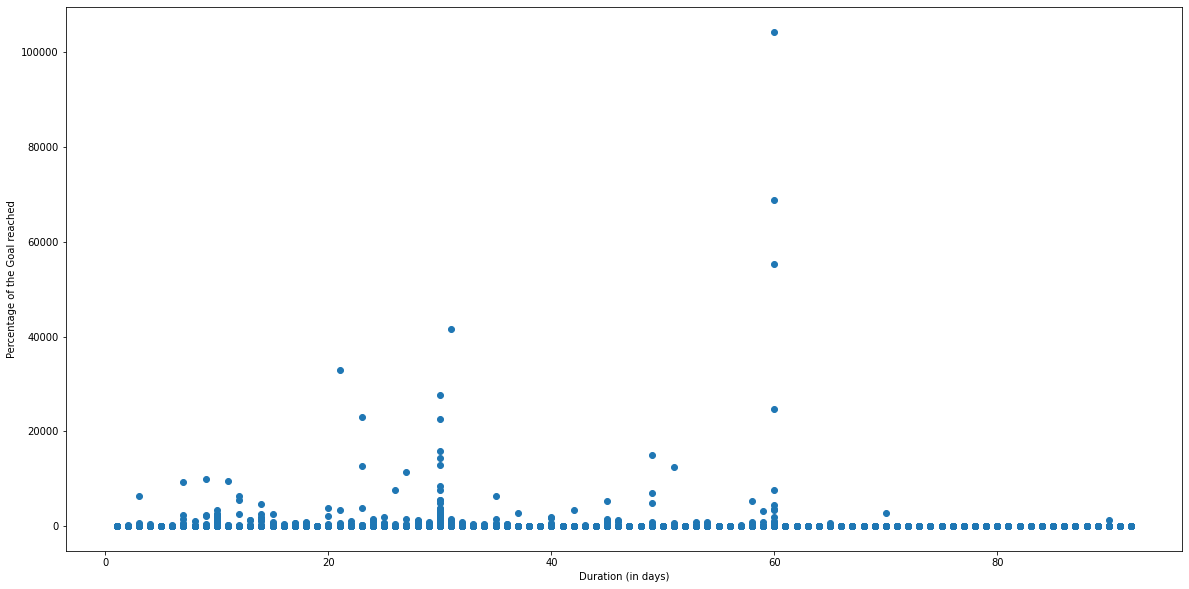

In [4]:
percentage_reached_real = df['percentage_reached_real']
duration_days = df['duration_days']
plt.figure(figsize=(20,10))
plt.scatter(duration_days, percentage_reached_real)
plt.xlabel('Duration (in days)')
plt.ylabel('Percentage of the Goal reached')
plt.show()

## histogram for main category in relation to the goal variable

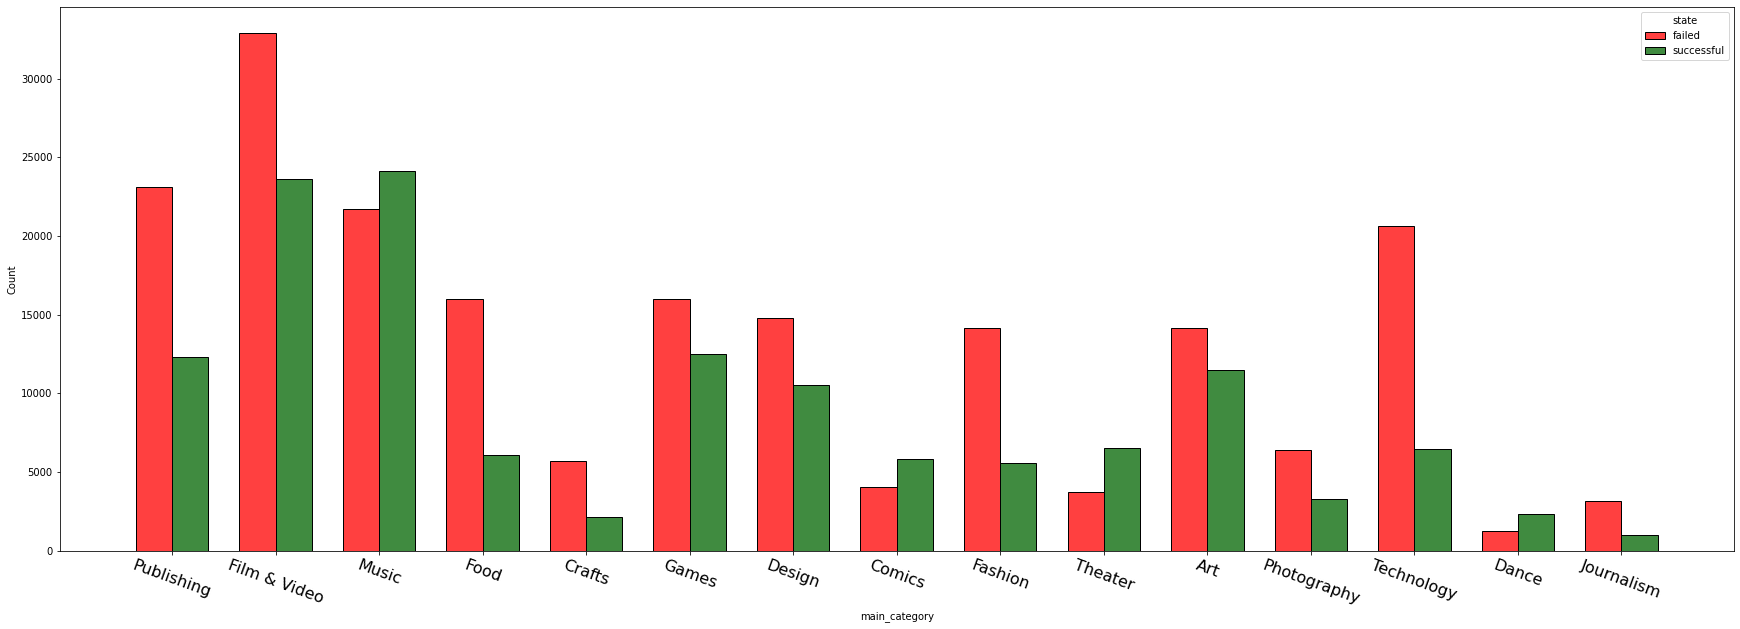

In [5]:
plt.figure(figsize=(30,10))
plt.xticks(size=16, rotation=-20)
ax = sns.histplot(data=df, x='main_category', hue='state', multiple='dodge', shrink=.7, palette=['red','darkgreen'])

There is a relation between the main category and the success of a campaign

## histogram for country in relation to the goal variable

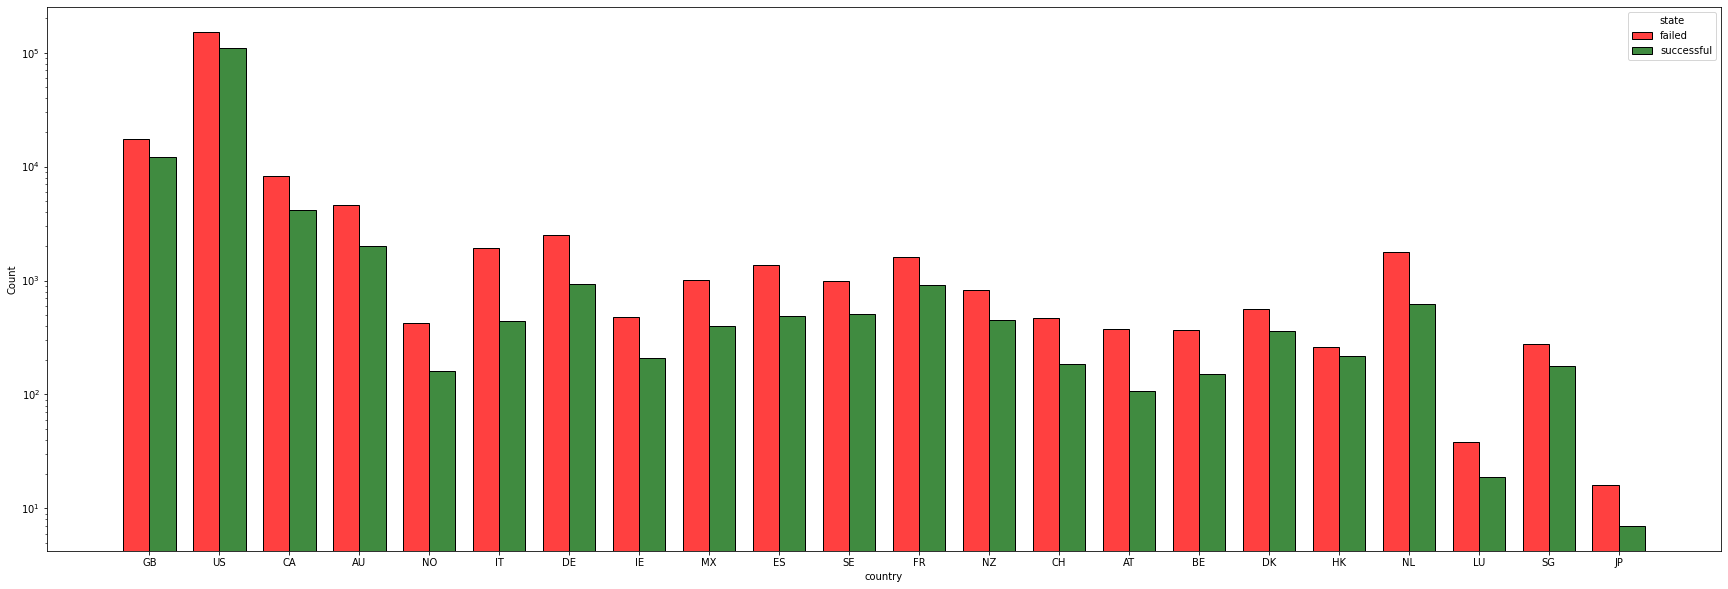

In [6]:
country = df.groupby('country').sum()
plt.figure(figsize=(30,10))
ax = sns.histplot(data=df, x='country', hue='state', multiple='dodge', shrink=.75, palette=['red','darkgreen'])
ax.set(yscale='log')
plt.show()

There is no significant relation between the country of a campaign and its success

## histogram for category_difference in relation to the goal variable

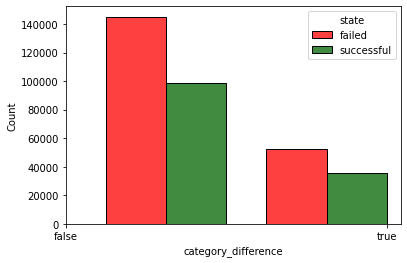

In [7]:
ax = sns.histplot(data=df, x='category_difference', hue='state', multiple='dodge', binwidth=.5, shrink=.75, palette=['red','darkgreen'])
ax.set_xticks([0,1])
ax.set_xticklabels(['false', 'true'])
plt.show()

There is a certain relation between the category_difference and the campaign success

## boxplot - main category - percentage reached

[None]

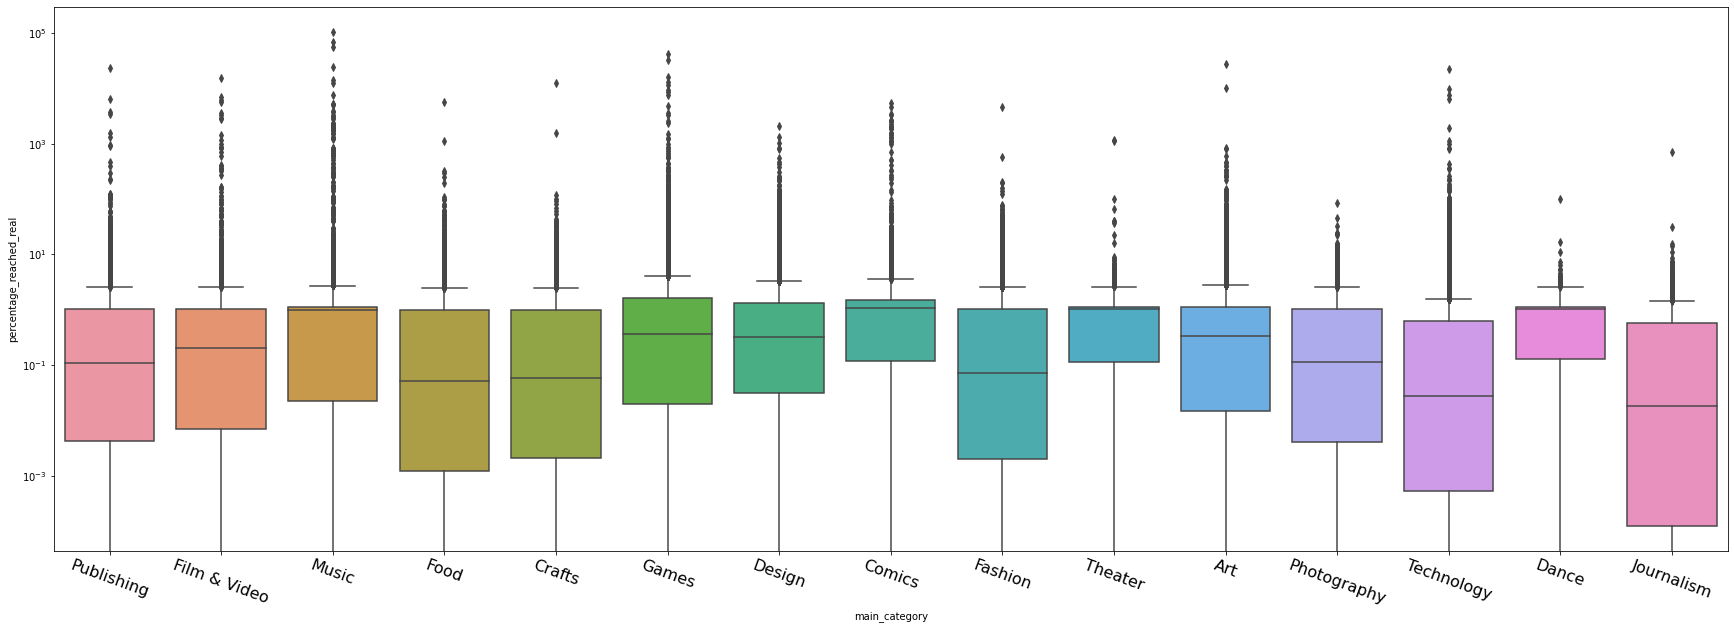

In [8]:
plt.figure(figsize=(30,10))
plt.xticks(size=16, rotation=-20)
ax = sns.boxplot(data=df, x='main_category', y='percentage_reached_real')
ax.set(yscale='log')

## Barplot and boxplot showing the amount of backers for each main category

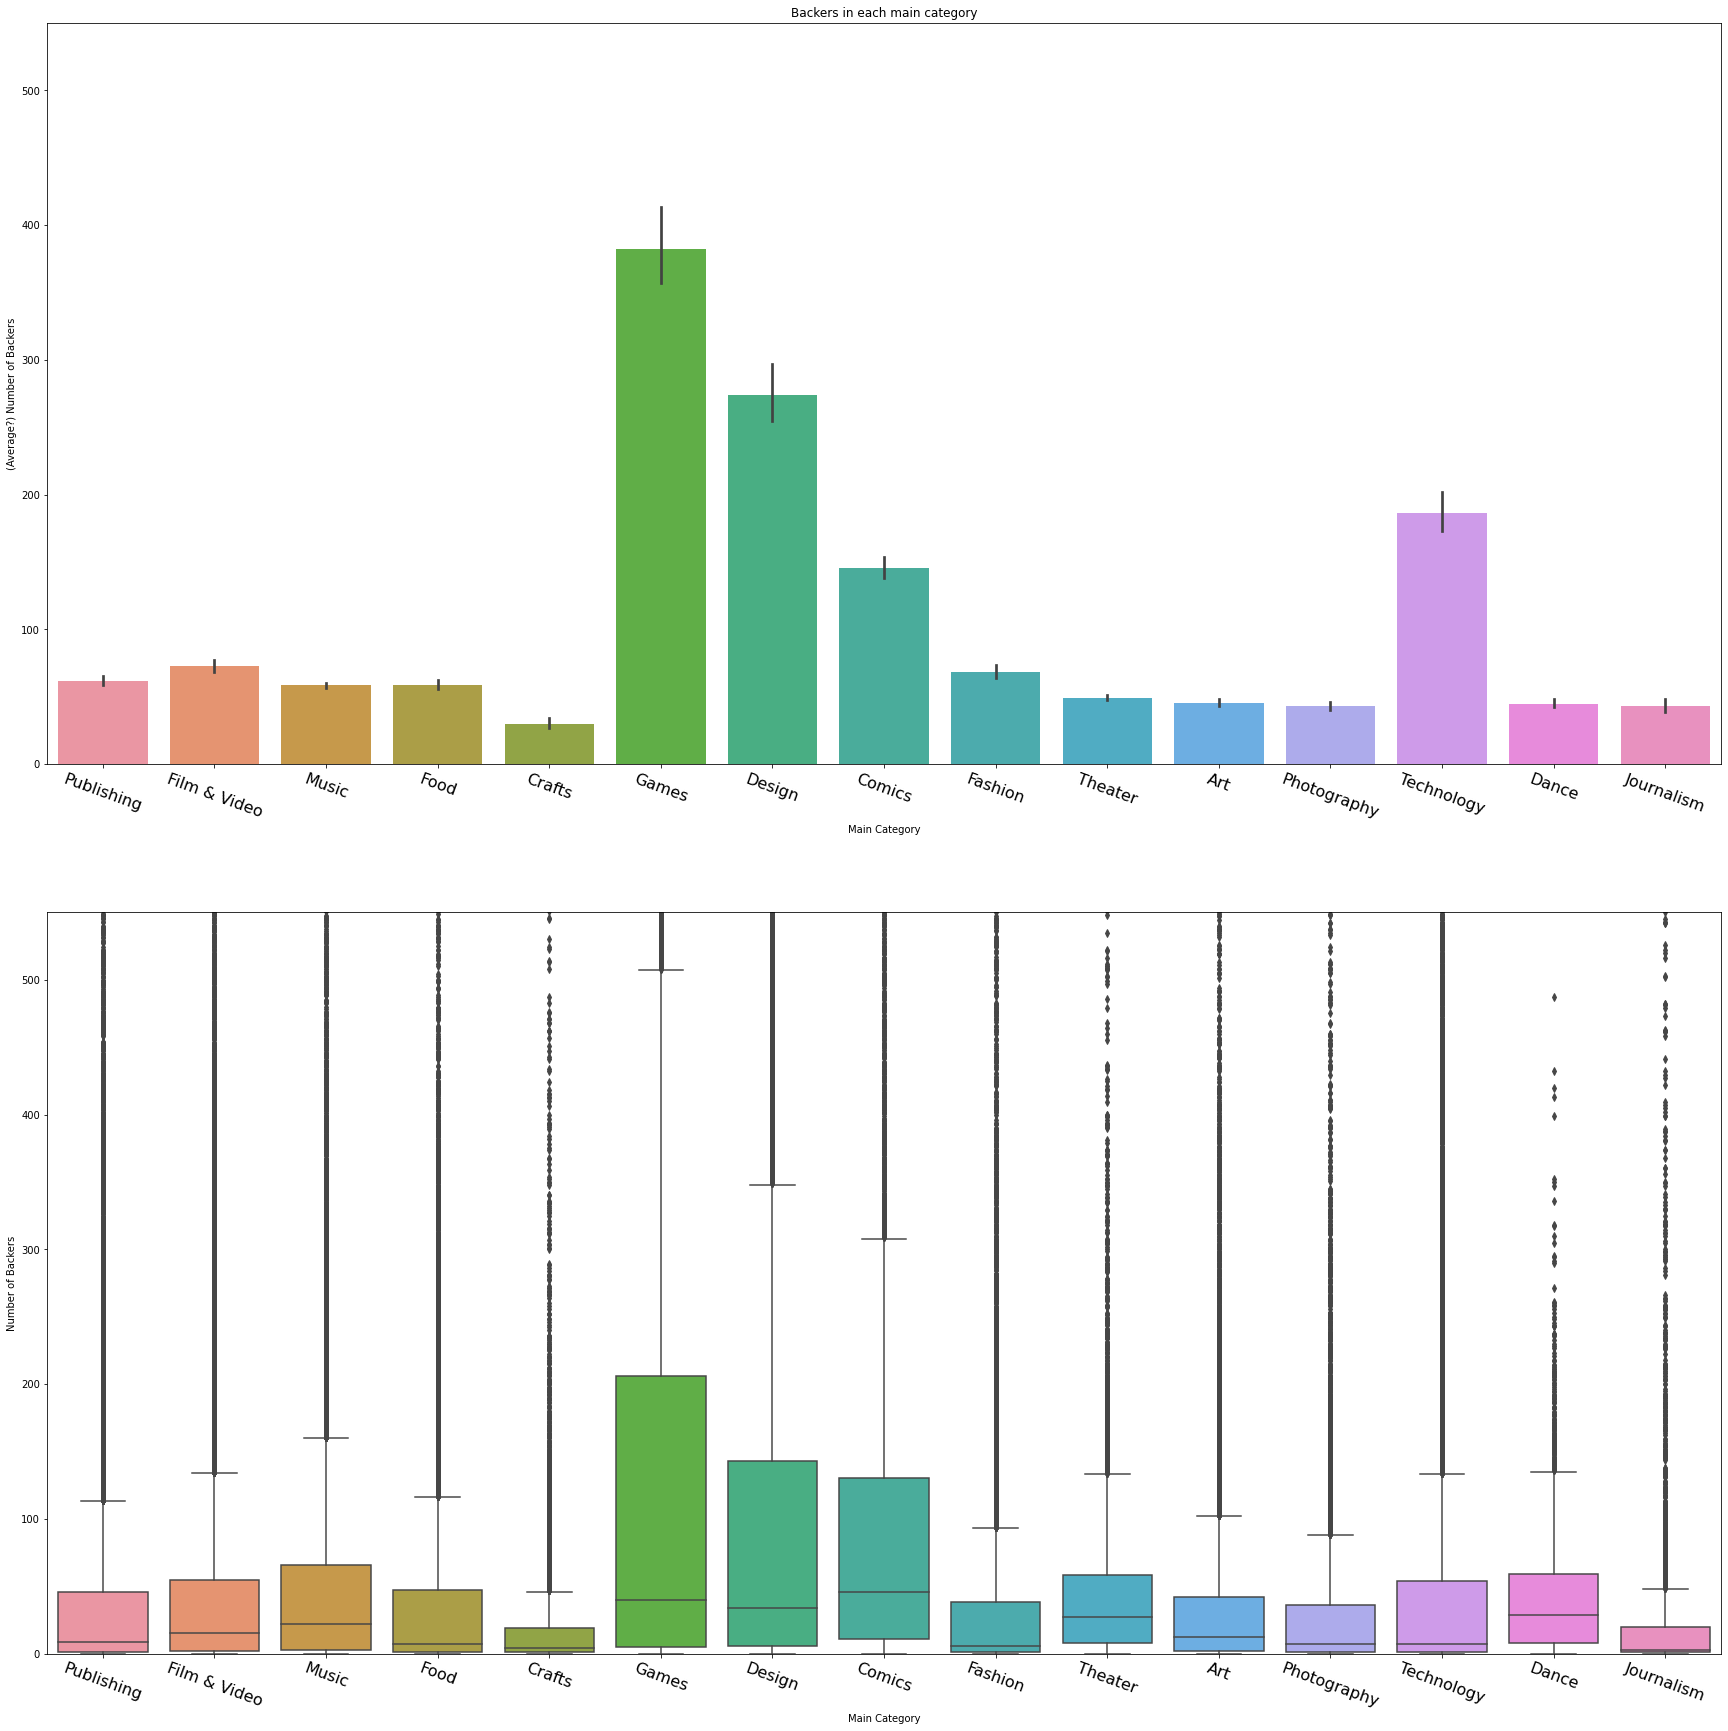

In [9]:
plt.figure(figsize=(30,30))
plt.subplot(2,1,1)
plt.xticks(size=16, rotation=-20)
plt.title('Backers in each main category')
sns.barplot(x=df['main_category'],
            y=df["backers"])
plt.xlabel('Main Category')
plt.ylabel('(Average?) Number of Backers')
plt.ylim(0, 550)

plt.subplot(2,1,2)
plt.xticks(size=16, rotation=-20)
sns.boxplot(x=df['main_category'],
            y=df["backers"])
plt.xlabel('Main Category')
plt.ylabel('Number of Backers')
plt.ylim(0, 550)

plt.show()

games, design, comics and technology seem to be the categories with the highest amount of support

## funding duration for states

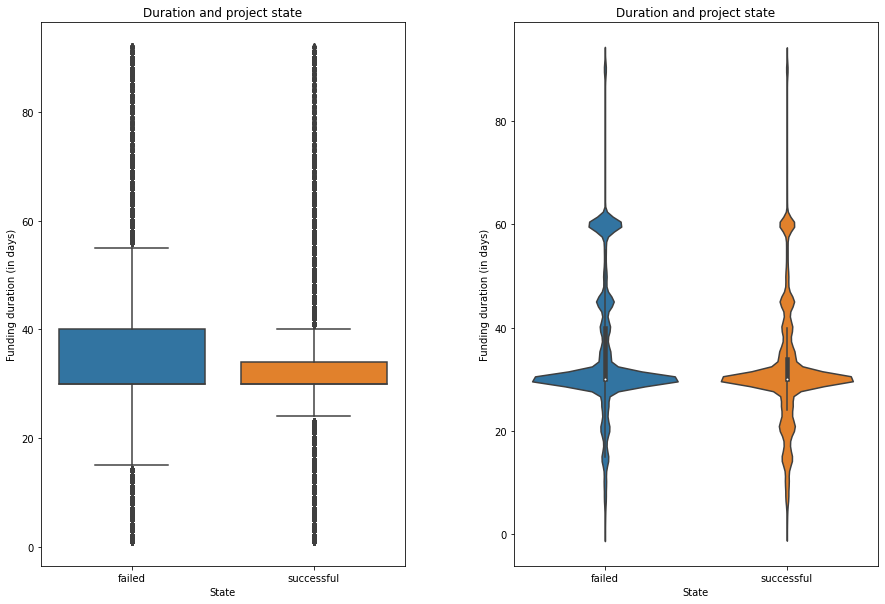

In [10]:
plt.figure(figsize=(15,10))
plt.subplots_adjust(wspace=0.3)
plt.subplot(1,2,1)
plt.title('Duration and project state')
sns.boxplot( x=df["state"],
             y=df['duration_days'])
plt.xlabel('State')
plt.ylabel('Funding duration (in days)')

plt.subplot(1,2,2)
plt.title('Duration and project state')
sns.violinplot( x=df["state"],
                y=df['duration_days'])
plt.xlabel('State')
plt.ylabel('Funding duration (in days)')
plt.show()

- range of funding duration seems to be larger for failed projects
- still data distribution seems to be very similar for both states
- most projects are open for funding on kickstarter for a month

## name length distribution for states

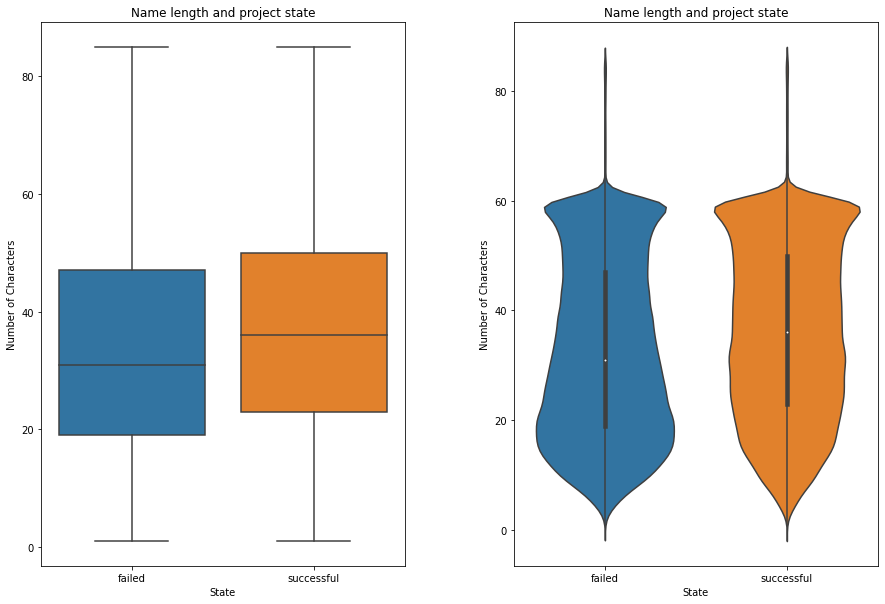

In [11]:
plt.figure(figsize=(15,10))
plt.subplots_adjust(wspace=0.3)
plt.subplot(1,2,1)
plt.title('Name length and project state')
sns.boxplot( x=df["state"],
                y=df['name_length'])
plt.xlabel('State')
plt.ylabel('Number of Characters')

plt.subplot(1,2,2)
plt.title('Name length and project state')
sns.violinplot( x=df["state"],
                y=df['name_length'])
plt.xlabel('State')
plt.ylabel('Number of Characters')
plt.show()

- There is not much of a difference in name length
- most of the names of successful projects seem to be a little bit longer than their counterparts